In [1]:
import pandas as pd
df_employee=pd.read_csv("empl.csv")
df_employee

,SNo,Name,Age,City,Country,Salary
0,1,Tom,28.0,Toronto,Canada,20000.0
1,2,Lee,31.0,Edmonto,Canada,3900.0
2,3,Dave,34.0,Toronto,Canada,8000.0
3,4,Anik,26.0,HongKong,Asia,66672.0
4,5,kamal,30.0,NaN,America,NaN
5,6,Geet,NaN,HongKong,Asia,30007.0
6,7,Steven,43.0,BayArea,America,8300.0
7,8,Ram,38.0,Hyderabad,Asia,54666.0
8,9,hari,50.0,newyork,America,67666.0
9,11,yami,NaN,newyork,America,8888.0


In [2]:
#lets chheck the null values in the dataset
df_employee.isnull().sum()
#based on below output we have sum null values which we need to impute

SNo        0
Name       0
Age        3
City       3
Country    0
Salary     3
dtype: int64

In [3]:
#Before imputing lets check the datatype
df_employee.dtypes
#datatypes are as expected

SNo          int64
Name        object
Age        float64
City        object
Country     object
Salary     float64
dtype: object

In [4]:
#lets do some graphical analysis
import seaborn as sns
import matplotlib.pyplot as plt
#lets draw bar graph which shows average salary in each country
sns.barplot(x="Country",y="Salary",data=df_employee)
plt.show()

<Figure size 640x480 with 1 Axes>

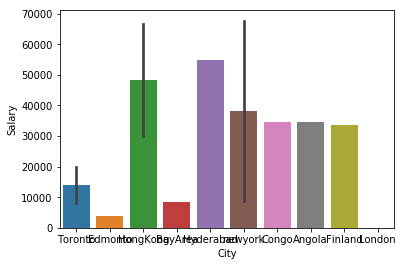

In [5]:
#let's plot the bar graph between city and salary
sns.barplot(x="City",y="Salary",data=df_employee)
plt.show()

In [6]:
#Now lets impute the null values in columns Age,City and Salary as found above
#For salary we will impute by groupping the cities
col_to_impute=["Age","City"]
for col in col_to_impute:
    if df_employee[col].dtype!="object":
        df_employee[col].fillna(df_employee[col].mean(),inplace=True)
    else:
        df_employee[col].fillna(df_employee[col].mode()[0],inplace=True)
        

In [7]:
#lets again check the null values
df_employee.isnull().sum()
#Only salary column is left which we will impute my taking mean of salaries belonging to same city

SNo        0
Name       0
Age        0
City       0
Country    0
Salary     3
dtype: int64

In [8]:
df_slry_grpby_city=df_employee.groupby(["City"]).agg({"Salary":"mean"})

In [9]:
for index in df_slry_grpby_city.index:
    df_employee.loc[df_employee["City"]==index,["Salary"]]=df_employee.loc[df_employee["City"]==index,["Salary"]].fillna(df_slry_grpby_city.loc[index])

In [10]:
#lets again check the null values
df_employee.isnull().sum()
#one value is left as single instance of that city was there and it was nan so for that we will direcly take mean of salary column

SNo        0
Name       0
Age        0
City       0
Country    0
Salary     1
dtype: int64

In [11]:
#imputing last null value in salary column as mentioned above
df_employee["Salary"].fillna(df_employee["Salary"].mean(),inplace=True)

In [12]:
#again checking the null values
df_employee.isnull().sum()
#All null values we have imputed

SNo        0
Name       0
Age        0
City       0
Country    0
Salary     0
dtype: int64

In [13]:
df_employee

,SNo,Name,Age,City,Country,Salary
0,1,Tom,28.000000,Toronto,Canada,20000.000000
1,2,Lee,31.000000,Edmonto,Canada,3900.000000
2,3,Dave,34.000000,Toronto,Canada,8000.000000
3,4,Anik,26.000000,HongKong,Asia,66672.000000
4,5,kamal,30.000000,HongKong,America,39333.666667
5,6,Geet,32.421053,HongKong,Asia,30007.000000
6,7,Steven,43.000000,BayArea,America,8300.000000
7,8,Ram,38.000000,Hyderabad,Asia,54666.000000
8,9,hari,50.000000,newyork,America,67666.000000
9,11,yami,32.421053,newyork,America,8888.000000


In [14]:
df_employee

,SNo,Name,Age,City,Country,Salary
0,1,Tom,28.000000,Toronto,Canada,20000.000000
1,2,Lee,31.000000,Edmonto,Canada,3900.000000
2,3,Dave,34.000000,Toronto,Canada,8000.000000
3,4,Anik,26.000000,HongKong,Asia,66672.000000
4,5,kamal,30.000000,HongKong,America,39333.666667
5,6,Geet,32.421053,HongKong,Asia,30007.000000
6,7,Steven,43.000000,BayArea,America,8300.000000
7,8,Ram,38.000000,Hyderabad,Asia,54666.000000
8,9,hari,50.000000,newyork,America,67666.000000
9,11,yami,32.421053,newyork,America,8888.000000


In [15]:
import numpy as np
for col in df_employee.columns:
    if df_employee[col].dtype!="object":
        print("column name : "+col+" and skewness is : ",df_employee[col].skew())
        if df_employee[col].skew() > 0.55:
            df_employee[col]=np.log1p(df_employee[col])

column name : SNo and skewness is :  -0.042047349267333736
column name : Age and skewness is :  1.034731645219974
column name : Salary and skewness is :  0.3169751648063996


In [16]:
#lets check skewness again
df_employee.skew()
#In above cell df_employee[col].dtype!="object" is not required as skew function returns skewness for numeric columns

SNo      -0.042047
Age       0.527799
Salary    0.316975
dtype: float64

In [17]:
df_employee

,SNo,Name,Age,City,Country,Salary
0,1,Tom,3.367296,Toronto,Canada,20000.000000
1,2,Lee,3.465736,Edmonto,Canada,3900.000000
2,3,Dave,3.555348,Toronto,Canada,8000.000000
3,4,Anik,3.295837,HongKong,Asia,66672.000000
4,5,kamal,3.433987,HongKong,America,39333.666667
5,6,Geet,3.509186,HongKong,Asia,30007.000000
6,7,Steven,3.784190,BayArea,America,8300.000000
7,8,Ram,3.663562,Hyderabad,Asia,54666.000000
8,9,hari,3.931826,newyork,America,67666.000000
9,11,yami,3.509186,newyork,America,8888.000000


In [18]:
#lets use pd.get_dummies function to convert categorical columns numeric form which machine can uderstand
df_employee_final=pd.get_dummies(df_employee,drop_first=True)

In [19]:
#dataset which machine can understand
df_employee_final.head()

,SNo,Age,Salary,Name_Anik,Name_Dave,Name_Geet,Name_Grig,Name_Kiara,Name_Lee,Name_Ram,...,City_Finland,City_HongKong,City_Hyderabad,City_London,City_Toronto,City_newyork,Country_America,Country_Asia,Country_Canada,Country_Europe
0,1,3.367296,20000.000000,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,2,3.465736,3900.000000,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,3,3.555348,8000.000000,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,4,3.295837,66672.000000,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,5,3.433987,39333.666667,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [20]:
#Lets seprate input and output
df_x=df_employee_final.drop(columns=["Salary"])
y=df_employee_final[["Salary"]]

In [21]:
#Lets use decision tree regressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
def maxr2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [22]:
regr=DecisionTreeRegressor()
final_r_state=maxr2_score(regr,df_x,y)

r2 score corresponding to  42  is  -0.788666632569768
r2 score corresponding to  43  is  0.33241127833938966
r2 score corresponding to  44  is  0.9504412593169944
r2 score corresponding to  45  is  0.9933874426283903
r2 score corresponding to  46  is  0.017105852051636172
r2 score corresponding to  47  is  0.22174792841795055
r2 score corresponding to  48  is  0.8429997832366579
r2 score corresponding to  49  is  -3.4350139325451394
r2 score corresponding to  50  is  0.9996113484238597
r2 score corresponding to  51  is  0.28003995332964193
r2 score corresponding to  52  is  0.21563784095180571
r2 score corresponding to  53  is  0.15155704651060264
r2 score corresponding to  54  is  0.7449422168349029
r2 score corresponding to  55  is  0.3273678562351764
r2 score corresponding to  56  is  0.18352874978770373
r2 score corresponding to  57  is  -1.733517290624873
r2 score corresponding to  58  is  -1.0092572246310967
r2 score corresponding to  59  is  0.9996811249498073
r2 score correspon

In [23]:
#lets use other model KNN regressor
#for using KNN regressor we need to find best value of k lets use grid search for that
#Before using grid search we need to scale our input set
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [24]:
#using grid search for optimal value of k in knn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':range(2,10)}
knr = KNeighborsRegressor()
clf = GridSearchCV(knr, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'n_neighbors': 8}

In [25]:
knr=KNeighborsRegressor(n_neighbors=8)
final_r_state=maxr2_score(knr,x,y)

r2 score corresponding to  42  is  -0.1437182550967162
r2 score corresponding to  43  is  -0.22453116200621093
r2 score corresponding to  44  is  -0.14487937828255149
r2 score corresponding to  45  is  -1.8873170182794827
r2 score corresponding to  46  is  -0.21247069081546432
r2 score corresponding to  47  is  0.0959750935706476
r2 score corresponding to  48  is  -0.3131956507748448
r2 score corresponding to  49  is  -0.15469353116249596
r2 score corresponding to  50  is  0.06034159848947618
r2 score corresponding to  51  is  -0.41273551937042763
r2 score corresponding to  52  is  -0.4448138249674556
r2 score corresponding to  53  is  0.10940451527028316
r2 score corresponding to  54  is  -0.21842492303834327
r2 score corresponding to  55  is  -0.09638689732166883
r2 score corresponding to  56  is  -0.1147880290863399
r2 score corresponding to  57  is  -0.3887958680815802
r2 score corresponding to  58  is  -1.0908636003092953
r2 score corresponding to  59  is  -0.055976761098538885
r2

In [26]:
from sklearn.linear_model import LinearRegression
lnr=LinearRegression()
final_r_state=maxr2_score(lnr,df_x,y)

r2 score corresponding to  42  is  -0.4384013405277323
r2 score corresponding to  43  is  0.45176133674041863
r2 score corresponding to  44  is  0.8951488185569842
r2 score corresponding to  45  is  0.9137406450543507
r2 score corresponding to  46  is  0.14811380315151534
r2 score corresponding to  47  is  0.8599054491154985
r2 score corresponding to  48  is  0.9836904840015839
r2 score corresponding to  49  is  0.9969986242016389
r2 score corresponding to  50  is  0.9745935057748006
r2 score corresponding to  51  is  0.6324592755836078
r2 score corresponding to  52  is  0.8916234579907183
r2 score corresponding to  53  is  0.8306539635892343
r2 score corresponding to  54  is  0.8616424935189263
r2 score corresponding to  55  is  0.7724327193324501
r2 score corresponding to  56  is  0.9172055536278662
r2 score corresponding to  57  is  -0.17845604164758466
r2 score corresponding to  58  is  -0.9171832155145239
r2 score corresponding to  59  is  0.9936924723322378
r2 score corresponding